# Market Basket Analysis on grocery Dataset.

### What is Market Basket Analysis?
- Market Basket analysis is a process that looks for relationships among entities and objects that frequently appear together,such as a collection of items in a shopper's cart.When you go to the supermarket, usually the first thing you do is grab a shopping cart. As you move up and down the aisles, you will pick up certain items and place them in your shopping cart. Most of these items may correspond to a shopping list that was prepared ahead of time, but other items may have been selected spontaneously. It works by looking for combinations of items that occur together frequently in transactions.

- Market Basket analysis comes in Unsupervised Learning technique of Machine Learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Orange
from orangecontrib.associate.fpgrowth import *
from Orange.data import Table, Domain, DiscreteVariable, ContinuousVariable
#from mlxtend.frequent_patterns import apriori
#from mlxtend.frequent_patterns import association_rules

In [2]:
with open('groceries.txt', 'r') as file:
    list_of_items=[]
    for line in file:
        items = line.replace('\n', '').split(',')
        list_of_items.append(items)


In [3]:
list_of_items

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [4]:
# Lets Find the which transaction as the Max no of items in the dataset. 
max_items=max(len(l) for l in list_of_items)

In [5]:
max_items   # There are total 23 items are there in the dataset which is highest transaction ever in the dataset on the 23 items.

32

In [6]:
col_names=[f'Item {i}' for i in range(1,max_items+1)]

In [7]:
col_names

['Item 1',
 'Item 2',
 'Item 3',
 'Item 4',
 'Item 5',
 'Item 6',
 'Item 7',
 'Item 8',
 'Item 9',
 'Item 10',
 'Item 11',
 'Item 12',
 'Item 13',
 'Item 14',
 'Item 15',
 'Item 16',
 'Item 17',
 'Item 18',
 'Item 19',
 'Item 20',
 'Item 21',
 'Item 22',
 'Item 23',
 'Item 24',
 'Item 25',
 'Item 26',
 'Item 27',
 'Item 28',
 'Item 29',
 'Item 30',
 'Item 31',
 'Item 32']

In [8]:
groceries = pd.read_csv('groceries.csv', header=None, names=col_names)

In [9]:
groceries.head(5)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
groceries.shape

(9835, 32)

In [11]:
# Lets Impute Some Values at This Nan(Missing) Values.
groceries.fillna(0, inplace=True)

In [12]:
groceries.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Lets find the unique set of Items in the list:
unique_items=[]
for l in list_of_items:
    for item in l:
        if item not in unique_items:
            unique_items.append(item)

In [14]:
unique_items

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'condensed milk',
 'long life bakery product',
 'butter',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'UHT-milk',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'cereals',
 'white bread',
 'bottled water',
 'chocolate',
 'curd',
 'flour',
 'dishes',
 'beef',
 'frankfurter',
 'soda',
 'chicken',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'packaged fruit/vegetables',
 'specialty bar',
 'butter milk',
 'pastry',
 'processed cheese',
 'detergent',
 'root vegetables',
 'frozen dessert',
 'sweet spreads',
 'salty snack',
 'waffles',
 'candy',
 'bathroom cleaner',
 'canned beer',
 'sausage',
 'brown bread',
 'shopping bags',
 'beverages',
 'hamburger meat',
 'spices',
 'hygiene articles',
 'napkins',
 'pork',
 'berries',
 'whipped/sour cream',
 'artif. sweetener',
 'grapes',
 'd

In [15]:
len(unique_items)

169

In [16]:
# Lets Make the dataFrame of Unique Items.
array = np.zeros((9835, 169))
df_item_grocery = pd.DataFrame(array, columns = unique_items)

for index in range(len(list_of_items)):
    for item in list_of_items[index]:
        df_item_grocery[item][index]=1
df_item_grocery.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# so we have converted our data into Numeric so that to find the best rules.

In [18]:
df_item_grocery['whole milk'].value_counts()    # so it is perfectly converted into nnumeric values of or we can also say tat
# The data is properly one Hot encoded.

0.0    7322
1.0    2513
Name: whole milk, dtype: int64

In [19]:
# There are Total 169 unique Items. 
# Now Lets Find the Count of UNique Items.
items =[]
for l in list_of_items:
    for item in l:
        items.append(item)
print(len(items))    # This is the all items which comes in every transactions i have just converted into the list.

count_of_items=[]
for unique in unique_items:
    count_of_items.append([unique, items.count(unique)])
count_of_items[:4]

43367


[['citrus fruit', 814],
 ['semi-finished bread', 174],
 ['margarine', 576],
 ['ready soups', 18]]

In [20]:
# Item Count Dataframe:
item_count_df = pd.DataFrame(count_of_items, columns = ['items', 'item_counts'])
item_count_df.head()

,items,item_counts
0,citrus fruit,814
1,semi-finished bread,174
2,margarine,576
3,ready soups,18
4,tropical fruit,1032


In [21]:
# Lets Sort the values Lets see which product sold the most.
desc_sorted_item_count = item_count_df.sort_values(by='item_counts',ascending=False)
desc_sorted_item_count.head()

,items,item_counts
7,whole milk,2513
11,other vegetables,1903
17,rolls/buns,1809
31,soda,1715
5,yogurt,1372


In [22]:
# As We can observe that whole Milk was sold most of the time and the customers buys milk as of it is daily usage product.
# and Then we can see there are other vegetables which is also more in the transactions.

desc_sorted_item_count['item_%']= desc_sorted_item_count['item_counts'].apply(lambda x : x/len(items))
desc_sorted_item_count.head()

,items,item_counts,item_%
7,whole milk,2513,0.057947
11,other vegetables,1903,0.043881
17,rolls/buns,1809,0.041714
31,soda,1715,0.039546
5,yogurt,1372,0.031637


In [23]:
# Lets Print (top 20 Items
desc_sorted_item_count.head(20)

,items,item_counts,item_%
7,whole milk,2513,0.057947
11,other vegetables,1903,0.043881
17,rolls/buns,1809,0.041714
31,soda,1715,0.039546
5,yogurt,1372,0.031637
24,bottled water,1087,0.025065
42,root vegetables,1072,0.024719
4,tropical fruit,1032,0.023797
52,shopping bags,969,0.022344
50,sausage,924,0.021307


In [24]:
desc_sorted_item_count.shape    # All 169 Items counts in desecending order.

(169, 3)

#  EDA( Exploratory Data Analysis)

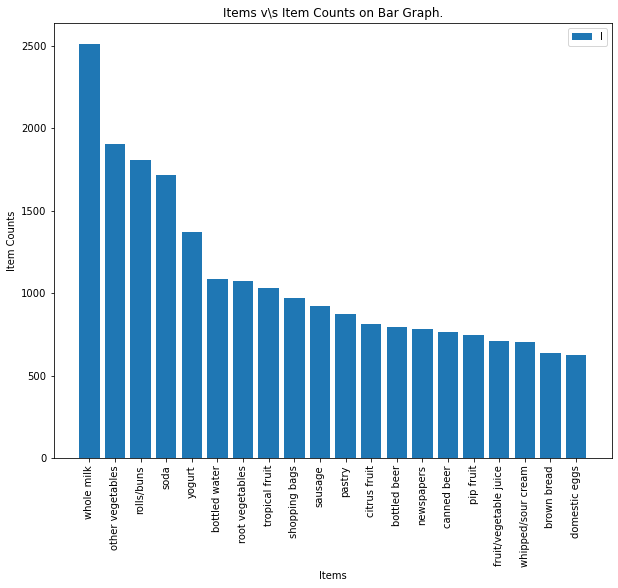

In [25]:
# Lets plot top20 items count.
top20_items = desc_sorted_item_count.iloc[:20,:]



# Lets Plot the bar graph.
plt.figure(figsize=(10,8))
plt.bar(x=top20_items['items'], height=top20_items['item_counts'])
plt.title("Items v\s Item Counts on Bar Graph.")
plt.xlabel('Items')
plt.ylabel('Item Counts')
plt.xticks(rotation=90)
plt.legend('Item_Counts')
plt.show()

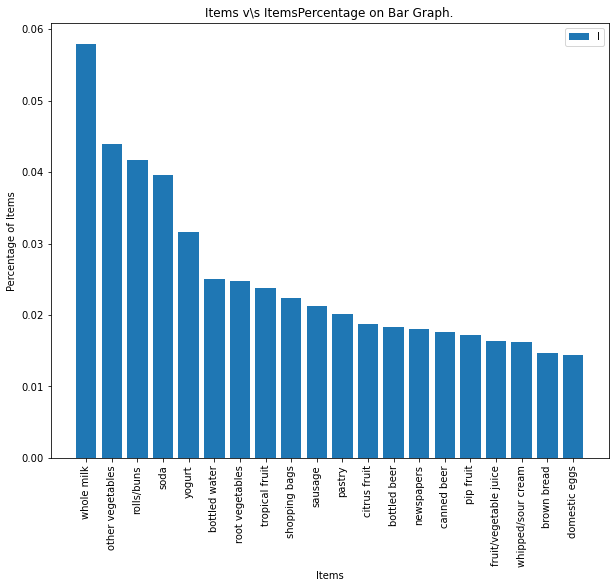

In [26]:
# Lets See by items Percentage.
plt.figure(figsize=(10,8))
plt.bar(x=top20_items['items'], height=top20_items['item_%'])
plt.title("Items v\s ItemsPercentage on Bar Graph.")
plt.xlabel('Items')
plt.ylabel('Percentage of Items')
plt.xticks(rotation=90)
plt.legend('Item_Counts')
plt.show()

# Pruning the dataset

In [27]:
# Lets Prune the dataset so that we can find the most important item which is definitely buyed by the customer.
def prune_dataset(input_df,items_in_perc, length_of_trans=2, total_sales_perc=0.4):
    items_in_perc['total_sales_%']=items_in_perc['item_%'].cumsum() # cumsum() is to find the cumulative sum of itemsPercentage.
    # Lets prune 'items_in_perc' data 
    pruned_items_using_perc = items_in_perc[items_in_perc['total_sales_%']<=total_sales_perc]
    selected_items = list(pruned_items_using_perc['items'])
    output_df = input_df[selected_items]
    output_df = output_df[output_df.sum(1)>=length_of_trans]
    return output_df, selected_items
    

In [28]:
pruned_df, selected_items = prune_dataset(df_item_grocery, desc_sorted_item_count)
pruned_df.head()

,whole milk,other vegetables,rolls/buns,soda,yogurt,bottled water,root vegetables,tropical fruit,shopping bags,sausage,pastry,citrus fruit,bottled beer
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
pruned_df.shape

(4585, 13)

In [30]:
# Great, now Our Data is Pruned. with respect to these all above items.
# Let see the items which got selected.
print('Selected Items:', selected_items)

Selected Items: ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer']


In [31]:
input_assoc_rules = pruned_df
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_assoc_rules.to_numpy(),Y= None)
data_gro_1_en, mapping = OneHot.encode(data_gro_1, include_class=False)

In [32]:
data_gro_1

[[0, 0, 0, 0, 1, ...],
 [1, 1, 0, 0, 0, ...],
 [1, 0, 0, 0, 1, ...],
 [0, 1, 1, 0, 0, ...],
 [0, 1, 0, 0, 0, ...],
 ...
]

In [33]:
data_gro_1_en, data_gro_1_en.shape

(array([[ True, False,  True, ..., False,  True, False],
        [False,  True, False, ..., False,  True, False],
        [False,  True,  True, ..., False,  True, False],
        ...,
        [ True, False, False, ...,  True,  True, False],
        [ True, False,  True, ..., False, False,  True],
        [ True, False, False, ..., False,  True, False]]),
 (4585, 26))

In [34]:
# OneHot.encode ---> it encodes in binary format. means wherever there was 1 
# it replaces by False and wherever it is 0 replaces by True.

In [35]:
min_support=0.01
num_trans = input_assoc_rules.shape[0]*min_support
print("Number of required transactions = ", int(num_trans))
itemsets = dict(frequent_itemsets(data_gro_1_en, min_support=min_support))   #dict-- key:value pair
print(len(itemsets), " itemsets have a support of ", min_support*100, "%")

Number of required transactions =  45
166886  itemsets have a support of  1.0 %


In [51]:
confidence = 0.3
rules_list=[]
rules = [(P,Q,supp, conf ) for P,Q, supp, conf in association_rules(itemsets, confidence) if len(Q)==1]
print("No of Rules generated:",len(rules))
# Lets decode the Onehot encoded Value so that we can use this itemsets for finding the support and confidence
names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_gro_1, mapping)}
#print(names)
antecedents = [val for val in names.values() if val.endswith('1')]
#print(antecedents)
rule_stats = list(rules_stats(rules, itemsets, input_assoc_rules.shape[0]))
# Lets apply for loop to find each an every terms of Association rules_mining.
for stats_terms in rule_stats:
    antecedent = stats_terms[0]
    consequent = stats_terms[1]
    consequent_name = names[next(iter(consequent))]
    #print(consequent_name)
    if consequent_name in antecedents:
        lhs_rule = [names[ante][:-2] for ante in antecedent if names[ante] in antecedents]
        ante = ",".join(lhs_rule)
        if ante and len(lhs_rule)>1:
            rule_dict ={
                'antecedent': ante,
                'consequent':consequent_name[:-2],
                'support': stats_terms[2],
                'confidence':stats_terms[3],
                'coverage':stats_terms[4],
                'strength':stats_terms[5],
                'lift':stats_terms[6],
                'leverage':stats_terms[7]
            }
            rules_list.append(rule_dict)

No of Rules generated: 995182


In [52]:
rule_stats_df = pd.DataFrame(rules_list)
rule_stats_df.head()

,antecedent,consequent,support,confidence,coverage,strength,lift,leverage
0,"other vegetables,rolls/buns",whole milk,52,0.436975,0.025954,17.058824,0.986960,-0.000150
1,"other vegetables,yogurt",whole milk,48,0.444444,0.023555,18.796296,1.003831,0.000040
2,"whole milk,yogurt",other vegetables,48,0.342857,0.030534,11.542857,0.972772,-0.000293
3,"other vegetables,yogurt",whole milk,46,0.446602,0.022465,19.708738,1.008704,0.000087
4,"whole milk,yogurt",other vegetables,46,0.304636,0.032933,10.701987,0.864329,-0.001575


In [54]:
# As we can see our DataFrame is created. with all association rule mining stats terms.
# Let see how many rules are made. it means that let see the Shape of the dataframe
rule_stats_df.shape      # As we can see 16628 rules are generated with confidence of 0.3%. 

(16628, 8)

In [64]:
# Lets do same basic analysis to understand the basic things.
rule_stats_df['lift'].max()

2.230611466183344

In [63]:
rule_stats_df.groupby('consequent').max().reset_index().sort_values(['lift', 'support', 'confidence'], ascending=False)

,consequent,antecedent,support,confidence,coverage,strength,lift,leverage
4,root vegetables,"yogurt,tropical fruit",228,0.463636,0.160523,9.076190,2.230611,0.016362
5,sausage,"shopping bags,rolls/buns",59,0.393162,0.041876,7.000000,2.201037,0.006136
8,tropical fruit,"yogurt,root vegetables",92,0.429907,0.066521,8.542056,2.156588,0.007278
1,citrus fruit,"whole milk,other vegetables,tropical fruit",66,0.333333,0.047328,5.210145,2.125637,0.006973
10,yogurt,"whole milk,tropical fruit",199,0.484211,0.144166,12.357895,1.891061,0.009265
2,other vegetables,"yogurt,whole milk,tropical fruit",228,0.643836,0.121483,22.136986,1.826724,0.012752
6,shopping bags,"soda,sausage",50,0.304878,0.035769,4.780488,1.782992,0.004789
0,bottled water,"yogurt,soda",59,0.333333,0.041876,6.438849,1.707635,0.004694
9,whole milk,"yogurt,tropical fruit",228,0.754098,0.101636,33.278689,1.703222,0.007287
3,rolls/buns,"yogurt,tropical fruit",97,0.522222,0.070229,15.844444,1.679095,0.005184


In [58]:
(rule_stats_df[['antecedent','consequent',
                  'support','confidence','lift']].groupby('consequent')
                                                 .max()
                                                 .reset_index()
                                                 .sort_values(['lift', 'support','confidence'],
                                                              ascending=False))

,consequent,antecedent,support,confidence,lift
4,root vegetables,"yogurt,tropical fruit",228,0.463636,2.230611
5,sausage,"shopping bags,rolls/buns",59,0.393162,2.201037
8,tropical fruit,"yogurt,root vegetables",92,0.429907,2.156588
1,citrus fruit,"whole milk,other vegetables,tropical fruit",66,0.333333,2.125637
10,yogurt,"whole milk,tropical fruit",199,0.484211,1.891061
2,other vegetables,"yogurt,whole milk,tropical fruit",228,0.643836,1.826724
6,shopping bags,"soda,sausage",50,0.304878,1.782992
0,bottled water,"yogurt,soda",59,0.333333,1.707635
9,whole milk,"yogurt,tropical fruit",228,0.754098,1.703222
3,rolls/buns,"yogurt,tropical fruit",97,0.522222,1.679095


In [ ]:
# By this what i have understood is the lift ratio is the most important term to find the rules.
# Lift is greater than 1 then the probility of having this antecedent ans consequent is most likely.


# as we can see the first row as support is 228 it means that number of times it occurs and confidence is 46% (i.e 46% of times, 
# customers who bought the left side items also bought root vegetables))